In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def y(theta,t):
    return theta[0]/(1+np.exp(-theta[1]*(t-theta[2])))

In [3]:
ts=np.linspace(0,1)
K=1
r=10 
t0=0.5 
noise=0.1

In [4]:
ys=y([K,r,t0],ts)+noise*np.random.rand(ts.shape[0])

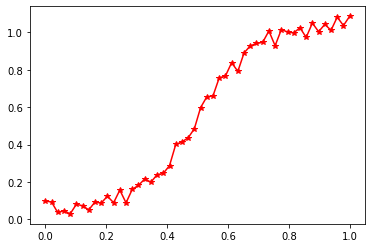

In [5]:
plt.plot(ts,ys,'r-*')

In [6]:
def y1(beta,t):
    return beta[0]+beta[1]*np.sin(beta[2]*t)

In [7]:
bt=np.array([8.23,3.16,2.50])

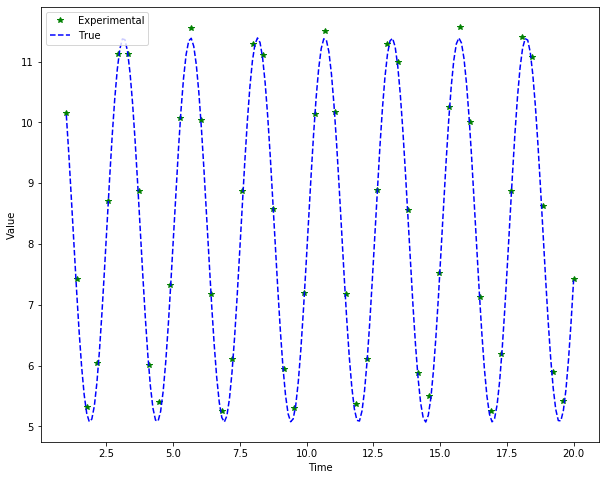

In [8]:
ts1=np.linspace(1,20,50)
ts2=np.linspace(1,20,200)
ys1=y1(bt,ts1)+0.3*np.random.rand(ts.shape[0])
ytrue=y1(bt,ts2)
plt.figure(figsize=(10,8))
plt.plot(ts1,ys1,'g*',label='Experimental')
plt.plot(ts2,ytrue,'b--',label='True')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

In [26]:
def algLM(x,yexp,param,alpha):
    J=np.zeros((x.shape[0],param.shape[0]))
    for i in range(J.shape[0]):
        J[i,0]=1
        J[i,1]=np.sin(param[2]*x[i])
        J[i,2]=param[1]*np.cos(param[2]*x[i])*x[i]
    Jc=np.dot(np.linalg.inv(np.dot(np.transpose(J),J)+alpha*np.identity(J.shape[1])),np.transpose(J))
    #delta=y1(param,x)-yexp
    delta=np.dot(Jc,y1(param,x)-yexp)
    param[0]=param[0]-delta[0]
    param[1]=param[1]-delta[1]
    param[2]=param[2]-delta[2]
    return param

In [30]:
betas=np.array([1,-1,1])
adj(ts1,ys1,0.4,betas,150)

Initial paramemeters: [ 1 -1  1] Initial error: 2926.2257045194388
Iteration=0, Res=2926.225705, alpha=0.400000
Decreasing lambda 0.13333333333333333
Iteration=1, Res=2926.225705, alpha=0.133333
Decreasing lambda 0.044444444444444446
Iteration=2, Res=2926.225705, alpha=0.044444
Decreasing lambda 0.014814814814814815
Iteration=3, Res=2926.225705, alpha=0.014815
Decreasing lambda 0.0049382716049382715
Iteration=4, Res=2926.225705, alpha=0.004938
Decreasing lambda 0.0016460905349794238
Iteration=5, Res=2926.225705, alpha=0.001646
Decreasing lambda 0.0005486968449931413
Iteration=6, Res=2926.225705, alpha=0.000549
Decreasing lambda 0.0001828989483310471
Iteration=7, Res=2926.225705, alpha=0.000183
Decreasing lambda 6.096631611034903e-05
Iteration=8, Res=2926.225705, alpha=0.000061
Increasing lambda 0.00012193263222069806
Iteration=9, Res=2926.225705, alpha=0.000122
Decreasing lambda 4.0644210740232684e-05
Iteration=10, Res=2926.225705, alpha=0.000041
Increasing lambda 8.128842148046537e-05

(8, 0, 1)

In [14]:
d1,d2,d3=algLM(ts1,ys1,np.array([1,-1,1]),3)

In [15]:
d1

7

In [16]:
d2

-1

In [17]:
d3

0